In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('2022_forbes_billionaires.csv')

In [3]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [4]:
df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [5]:
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 142.3+ KB


In [11]:
df['networth']=(df['networth']
                .str.replace('$','',regex=False)
                .str.replace('B','',regex=False)
                .astype(float)
               )

Cleaned and transformed financial data by converting textual net worth values into numerical format for statistical analysis.

In [14]:
df.isnull().sum()

rank        0
name        0
networth    0
age         0
country     0
source      0
industry    0
dtype: int64

Checked for missing values across all key features and confirmed data completeness before proceeding with analysis.

Which industries produce the highest number of billionaires?

In [17]:
industry_counts=df['industry'].value_counts()
industry_counts.head(10)

industry
Finance & Investments    386
Technology               329
Manufacturing            322
Fashion & Retail         246
Healthcare               212
Food & Beverage          201
Real Estate              189
Diversified              178
Media & Entertainment     95
Energy                    93
Name: count, dtype: int64

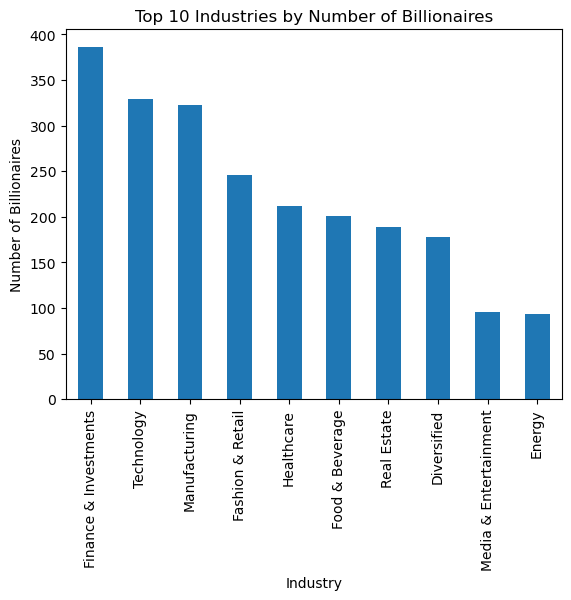

In [18]:
industry_counts.head(10).plot(kind='bar')
plt.title("Top 10 Industries by Number of Billionaires")
plt.xlabel("Industry")
plt.ylabel("Number of Billionaires")
plt.show()

Identified Finance & Investments as the leading industry by billionaire count, surpassing Technology and Manufacturing,
highlighting the strong role of capital markets in wealth creation.

Which industries generate the highest total net worth, not just the most peopl?

In [23]:
industry_wealth = df.groupby('industry')['networth'].sum().sort_values(ascending=False)
industry_wealth.head(10)

industry
Technology               2168.40
Finance & Investments    1734.30
Fashion & Retail         1613.20
Manufacturing            1079.80
Diversified               939.50
Food & Beverage           933.35
Healthcare                708.90
Real Estate               685.80
Automotive                582.60
Media & Entertainment     493.60
Name: networth, dtype: float64

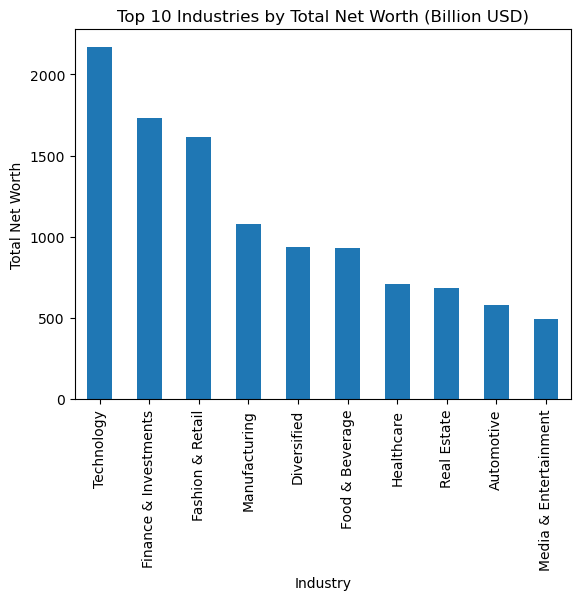

In [24]:
industry_wealth.head(10).plot(kind='bar')
plt.title("Top 10 Industries by Total Net Worth (Billion USD)")
plt.xlabel("Industry")
plt.ylabel("Total Net Worth")
plt.show()

In [25]:
country_counts=df['country'].value_counts()
country_counts.head(10)

country
United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: count, dtype: int64

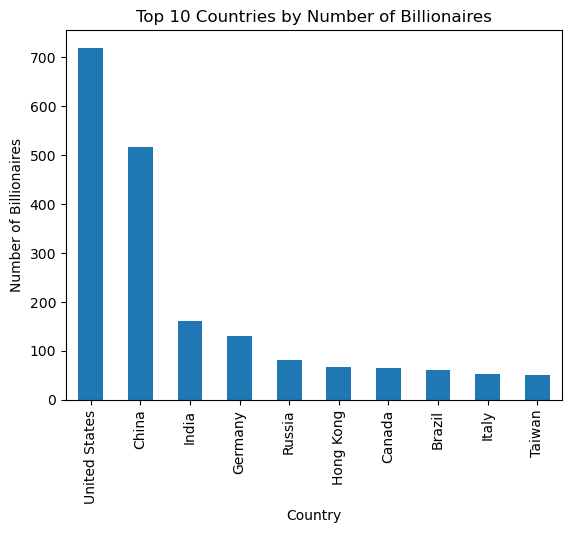

In [26]:
country_counts.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Number of Billionaires")
plt.xlabel("Country")
plt.ylabel("Number of Billionaires")
plt.show()

Analyzed country-wise billionaire distribution and found the United States leading globally, with India ranking third, highlighting regional concentration of wealth.

In [ ]:
Does higher age always mean higher net worth?

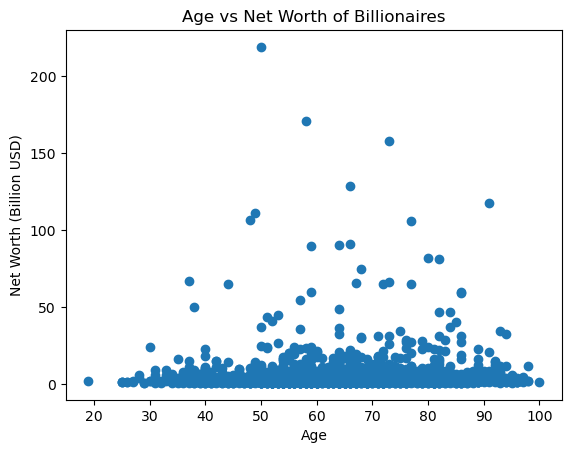

In [27]:
plt.scatter(df['age'], df['networth'])
plt.title("Age vs Net Worth of Billionaires")
plt.xlabel("Age")
plt.ylabel("Net Worth (Billion USD)")
plt.show()

In [ ]:
Explored the relationship between age and net worth and observed a weak correlation, 
indicating that age alone does not determine wealth magnitude.

Exploratory Data Analysis – Forbes Billionaires 2022

Conducted end-to-end EDA using Python (Pandas, Matplotlib, Seaborn) on Forbes Billionaires dataset.

Cleaned and transformed net worth data into numerical format for analysis.

Found Finance & Investments leading by billionaire count, while Technology dominated total net worth.

Identified the United States as the top country by billionaire count, with India ranking third globally.

Observed a weak relationship between age and net worth, suggesting age is not a strong predictor of wealth.

I validated EDA insights using hypothesis testing.

Do Technology billionaires have a higher average net worth than Finance & Investment billionaires, or is the difference just random?

We are comparing:

One numerical variable → networth

Between two independent groups → Technology vs Finance
Correct test: Independent Two-Sample t-test

Net worth must be numeric and continuous → which you already ensured during data cleaning.

In [28]:
tech_networth = df[df['industry'] == 'Technology']['networth']
finance_networth = df[df['industry'] == 'Finance & Investments']['networth']

In [30]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    tech_networth,
    finance_networth,
    equal_var=False
)

t_stat, p_value


(2.048205131646942, 0.041124845799410385)

The p-value is less than 0.05, so we reject the null hypothesis.
This indicates that the difference in average net worth between Technology and Finance & Investments billionaires is statistically significant.

Validated EDA findings using hypothesis testing (two-sample t-test) and found a statistically significant difference in average net worth between Technology and Finance & Investment billionaires.

In [31]:
corr_matrix = df[['networth', 'age']].corr()
corr_matrix

,networth,age
networth,1.000000,0.039966
age,0.039966,1.000000


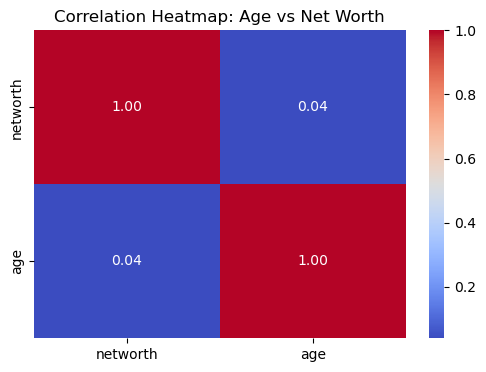

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap: Age vs Net Worth")
plt.show()


Confirmed through correlation analysis that age has minimal influence on billionaire net worth.